<a href="https://colab.research.google.com/github/VisarBuza/artificial-intelligence-2021-22/blob/main/assignment-three/classification/RealFakeJobPosts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Real/Fake Job Posting Prediction

In this notebook we preprocess a dataset of Real/Fake Job Posting Prediction and its relevant information. The data set can be found [here](https://www.kaggle.com/shivamb/real-or-fake-fake-jobposting-prediction).

We have a dataset which classifies if job posting is real or fake according to features in it. We will try to use this data to create a model which tries predict if a the post is real/fake.

# Imports

In [24]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
sns.set_context('notebook')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from imblearn.over_sampling import RandomOverSampler
pd.options.mode.chained_assignment = None


# Peak at the dataset

In [25]:
df = pd.read_csv('/fake_job_postings.csv')

In [26]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

# Exploring the dataset
df.fraudulent.value_counts(normalize=True).plot(kind='bar', alpha=0.5, yticks= df.fraudulent.value_counts(normalize=True))

In [28]:
df['employment_type'].value_counts()


Full-time    11620
Contract      1524
Part-time      797
Temporary      241
Other          227
Name: employment_type, dtype: int64

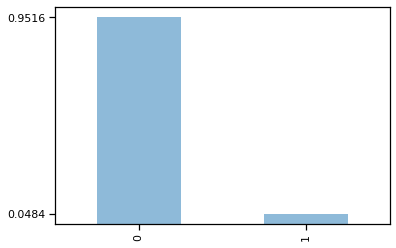

In [29]:
df.fraudulent.value_counts(normalize=True).plot(kind='bar', alpha=0.5, yticks= df.fraudulent.value_counts(normalize=True))


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


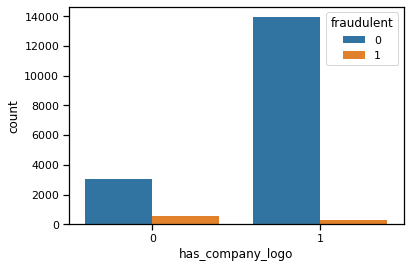

In [30]:
sns.countplot(df['has_company_logo'], hue = df['fraudulent'])

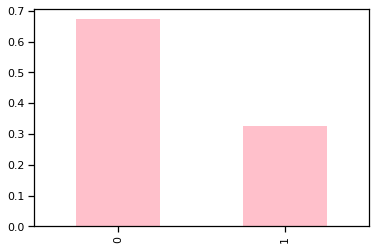

In [31]:
df.has_company_logo[df.fraudulent==1].value_counts(normalize=True).plot(kind='bar', color='pink')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


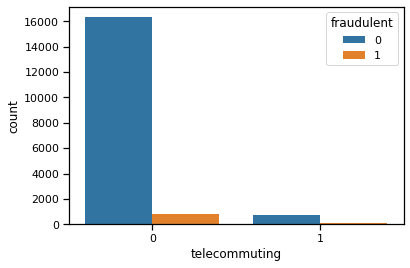

In [32]:
sns.countplot(df['telecommuting'], hue = df['fraudulent'])


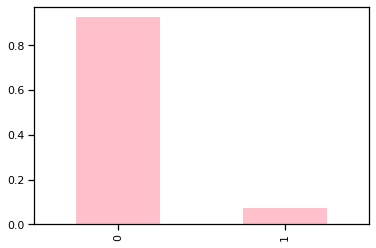

In [33]:
df.telecommuting[df.fraudulent==1].value_counts(normalize=True).plot(kind='bar', color='pink')


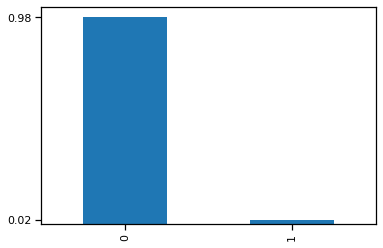

In [34]:
df.fraudulent[(df.has_questions == 1) & (df.has_company_logo == 1)].value_counts(normalize=True).plot(kind='bar', yticks= df.fraudulent[(df.has_questions == 1) & (df.has_company_logo == 1)].value_counts(normalize=True))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


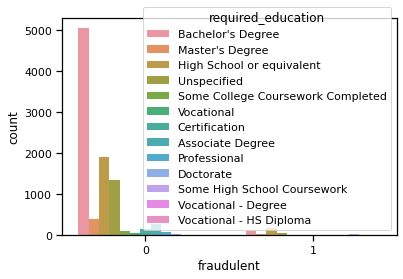

In [35]:
sns.countplot(df['fraudulent'], hue=df['required_education'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


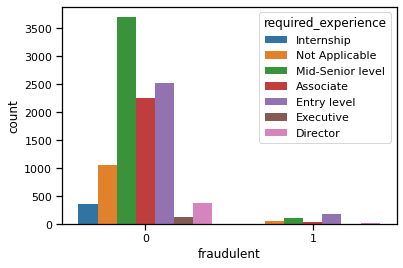

In [36]:
sns.countplot(df['fraudulent'], hue=df['required_experience'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


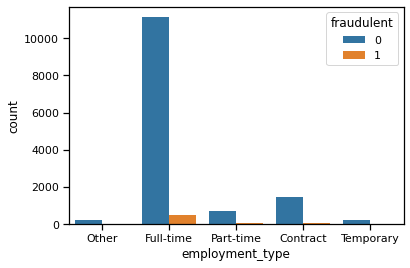

In [37]:
sns.countplot(df['employment_type'], hue=df['fraudulent'])

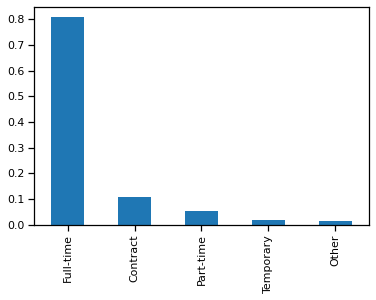

In [38]:
df.employment_type[df.fraudulent==0].value_counts(normalize=True).plot(kind='bar')
plt.show()

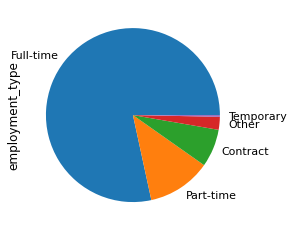

In [39]:
df.employment_type[df.fraudulent==1].value_counts(normalize=True).plot(kind='pie')
plt.show()

# Preparing the data

In [40]:
type_job = pd.get_dummies(df['employment_type'], drop_first = True)
required_ed = pd.get_dummies(df['required_education'], drop_first = True)

In [41]:
df = pd.concat([df, type_job], axis = 1)
df = pd.concat([df, required_ed], axis = 1)

df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,Full-time,Other,Part-time,Temporary,Bachelor's Degree,Certification,Doctorate,High School or equivalent,Master's Degree,Professional,Some College Coursework Completed,Some High School Coursework,Unspecified,Vocational,Vocational - Degree,Vocational - HS Diploma
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


# Remove NaN values and convert string to numerical

In [42]:
df['description'].fillna('', inplace=True)
df['benefits'].fillna('', inplace=True)
df['company_profile'].fillna('', inplace=True)
df['industry'].fillna('', inplace=True)
df['function'].fillna('', inplace=True)
df['department'].fillna('', inplace=True)
df['department'].fillna('', inplace=True)

for index, row in df.iterrows():
    df['description'][index] = len(str(row['description']))
    df['benefits'][index] = len(str(row['benefits']))
    df['company_profile'][index] = len(str(row['company_profile']))    
    df['requirements'][index] = len(str(row['requirements']))
    df['industry'][index] = len(str(row['industry']))
    df['function'][index] = len(str(row['function']))
    df['department'][index] = len(str(row['department']))

df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,Full-time,Other,Part-time,Temporary,Bachelor's Degree,Certification,Doctorate,High School or equivalent,Master's Degree,Professional,Some College Coursework Completed,Some High School Coursework,Unspecified,Vocational,Vocational - Degree,Vocational - HS Diploma
0,1,Marketing Intern,"US, NY, New York",9,NaN,885,905,852,0,0,1,0,Other,Internship,NaN,0,9,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",7,NaN,1286,2077,1433,1292,0,1,0,Full-time,Not Applicable,NaN,25,16,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",0,NaN,879,355,1363,0,0,1,0,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,Account Executive - Washington DC,"US, DC, Washington",5,NaN,614,2600,1429,782,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,17,5,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,5,Bill Review Manager,"US, FL, Fort Worth",0,NaN,1628,1520,757,21,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,22,20,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",5,NaN,1708,1442,1273,857,0,1,1,Full-time,Mid-Senior level,NaN,17,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",10,NaN,2270,1216,721,511,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,8,19,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",0,NaN,228,1291,1235,0,0,0,0,Full-time,NaN,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17878,17879,Graphic Designer,"NG, LA, Lagos",0,NaN,0,506,502,216,0,0,1,Contract,Not Applicable,Professional,14,6,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


# Oversampling and training the model

In [43]:

from warnings import filterwarnings
filterwarnings('ignore')

X= df[['telecommuting','description','requirements','benefits', 'company_profile','has_company_logo', 'has_questions', 
       'Other','Part-time', 'Temporary', 'Bachelor\'s Degree', 'Certification', 'Doctorate', 'High School or equivalent', 'Master\'s Degree', 
       'Professional', 'Some College Coursework Completed', 'Unspecified', 'Vocational', 'Vocational - Degree', 
       'Vocational - HS Diploma']]
y = df['fraudulent']

oversample = RandomOverSampler(sampling_strategy='minority')

X_over, y_over = oversample.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=102)

X_train

,telecommuting,description,requirements,benefits,company_profile,has_company_logo,has_questions,Other,Part-time,Temporary,Bachelor's Degree,Certification,Doctorate,High School or equivalent,Master's Degree,Professional,Some College Coursework Completed,Unspecified,Vocational,Vocational - Degree,Vocational - HS Diploma
17860,0,1091,29,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6744,0,1712,3,0,1491,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
15935,0,558,241,173,94,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14603,0,816,477,257,1395,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0
15675,0,2484,3,0,228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17353,0,813,1115,464,159,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4075,0,214,320,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2290,0,556,873,239,213,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31310,1,166,90,23,751,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


# Predicting and results

# Logistic Regression

In [44]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
y_pred = logmodel.predict(X_test)

In [45]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.78      0.78      0.78      5050
           1       0.79      0.79      0.79      5159

    accuracy                           0.78     10209
   macro avg       0.78      0.78      0.78     10209
weighted avg       0.78      0.78      0.78     10209



In [46]:
print(accuracy_score(y_test, y_pred))

0.7849936330688608


In [47]:
print(confusion_matrix(y_test,y_pred))


[[3936 1114]
 [1081 4078]]


# Naive Bayes

In [48]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.60      0.69      5050
           1       0.69      0.86      0.77      5159

    accuracy                           0.73     10209
   macro avg       0.75      0.73      0.73     10209
weighted avg       0.75      0.73      0.73     10209



In [50]:
print(accuracy_score(y_test, y_pred))

0.7335684200215496


In [51]:
print(confusion_matrix(y_test,y_pred))


[[3034 2016]
 [ 704 4455]]


# K-Nearest Neighbors

In [53]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4556  494]
 [   0 5159]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95      5050
           1       0.91      1.00      0.95      5159

    accuracy                           0.95     10209
   macro avg       0.96      0.95      0.95     10209
weighted avg       0.96      0.95      0.95     10209



In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95      5050
           1       0.91      1.00      0.95      5159

    accuracy                           0.95     10209
   macro avg       0.96      0.95      0.95     10209
weighted avg       0.96      0.95      0.95     10209



In [55]:
print(accuracy_score(y_test, y_pred))

0.951611323342149


In [56]:
print(confusion_matrix(y_test, y_pred))

[[4556  494]
 [   0 5159]]


# Random Forest

In [57]:
model = RandomForestClassifier(n_estimators=20, random_state=123)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [58]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5050
           1       0.99      1.00      0.99      5159

    accuracy                           0.99     10209
   macro avg       0.99      0.99      0.99     10209
weighted avg       0.99      0.99      0.99     10209



In [59]:
print(accuracy_score(y_test, y_pred))

0.9933392105005387


In [60]:
print(confusion_matrix(y_test,y_pred))

[[4982   68]
 [   0 5159]]
